# Chapter 2: Summarizing data

### Guided Practice 2.2

Scatterplot reveals associations between variables, and are useful to see this correlation both qualitavely and quantitatively.

### Guided Practice 2.3

Two variables that would have and horseshoe-shaped relationship can be on the y axis the benefit associated with stress and on the x axis the stress itself: it is known that some stress is necessary to excel, but after a certain threshold, the benefit goes down.

### Guided Practice 2.4

The value $x_{i}$ represent an observation of the variable we want to compute the average.

### Guided Practice 2.5

The value $n$ represents the number of observations in which we are computing the mean.

### Guided Practice 2.9

Even in those pictures, thanks to the density of the dots (both overlapping and stacked) we can see it is right skewed, however the best way to see a skew is to use a histogram or a stacked dot plot.

### Guided Practice 2.10

In the dot plots it is visually easier to see the exact interest rate (and not the bins).

### Guided Practice 2.12

I would expect the dataset to be bimodal given that we are measuring both children and adults.

### Guided Practice 2.13

By looking at the descripton of figure 2.9, we see that mean and standard deviation alone can't describe the "shape" of the data, therefore we can have different distributions sharing those two parameters. Therefore, we need modality and whether or not the distribution is symmetric or skewed.

### Guided Practice 2.15

Being the _median_ the $50^{th}$ percentile (from its definitition), between $Q_{1}$ and the median itself we have the $25\%-50\%$ of the data. From the median and $Q_{3}$ we have the $50\%-75\%$ of the data.

### Guided Pracrice 2.16

We can proceed by plotting the `loan50` dataset informations and the box plot.

count    50.000000
mean     11.567200
std       5.052115
min       5.310000
25%       7.960000
50%       9.930000
75%      13.715000
max      26.300000
Name: interest_rate, dtype: float64

<AxesSubplot:>

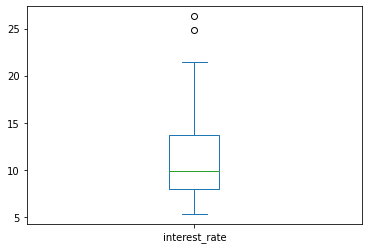

In [16]:
import pandas as pd

from pathlib import Path 

loan50_path = Path("../datasets") / "loan50.csv"
loan50_df = pd.read_csv(loan50_path)

display(loan50_df["interest_rate"].describe())
loan50_df["interest_rate"].plot.box()

While we received the first and third quartiles, we can calculate $IQR = Q_{3} - Q_{1} = 5.755$.

### Guided Practice 2.17

* (a) The mean is more affected by extreme observations: it is less _robust_.
* (b) The standard deviation is more affected by extreme observations than the _IQR_.

### Guided Practice 2.19

Being right-skewed, with the mean being "pulled" towards the two outliers above, I would be more interested in the median rather than the mean.

### Guided Practice 2.22

The intensity map shows visually and very clearly the "intensity" (the household income) for each of the studied county, giving us a quick glance on the wealthiest counties.

### Exercise 2.1 - Mammal life spans.

* (a) Apparently, there's a positive association between life span and length of gestation.
* (b) I would expect a positive association still, with the shape of a parable.
* (c) While the association may not be strong, there definitely is, therefore they are not independent. Apart for some outliers, we can definitely see this positive association which naturally flattens out as there is a limit to gestation days, as well as life span, which are dictated by nature.

### Exercise 2.2 - Associations.

* (a) Plots (1) linear and (3) nonlinear.
* (b) Plot (4) linear.
* (c) Plot (2).

### Exercise 2.3 - Reproducing bacteria.

I would assume that initially bacteria reproduction is quite strong, until it approaches the limit of one million, at which the rate of reproduction starts to flatten out. Let's try to model such phenomena with a Python script.

In [47]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

UPPER_BOUND = 1000000

def simulate_reproduction(time_epochs, growth_coefficient=-1, every=1):
    x = [i for i in range(1, time_epochs + 1)]
    y = []

    if growth_coefficient == -1:
        growth_coefficient = UPPER_BOUND / np.log(time_epochs) - 1

    for epoch in range(time_epochs):
        prev = 0 if epoch == 0 else y[epoch - 1]

        n_bacteria = growth_coefficient * np.log(epoch + 1)
        
        if n_bacteria > UPPER_BOUND:
            n_bacteria = (UPPER_BOUND - prev) * np.random.random_sample() + prev
        
        y += [n_bacteria]

    indices = np.arange(len(x), step=every)

    return np.array(x)[indices], np.array(y)[indices]

Let's see how our simulation works.

[]

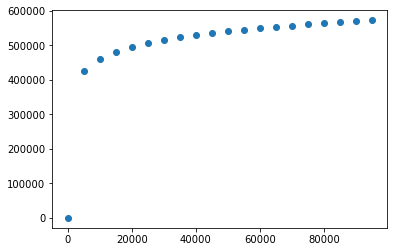

In [59]:
x, y = simulate_reproduction(100000, 50000, 5000)

plt.scatter(x, y) 

plt.plot()

I don't know whether this is realistic or not, but I would assume this is how the population will increase: quickly before hitting the upper limit, once which the reproduction approaches the limit itself. 

### Exercise 2.4 - Office productivity.

We will draw a scatter plot using Python, knowing that the function that approximates a function which increases and then starts to decrease in a bell shape fashio is a polynomial of the form $ax^{2} + bx + c$ where $a < 0$.

In [70]:
def stress_model_function(n, a, every=1):
    x = np.array([i for i in range(1, n + 1)])
    a = - np.abs(a)
    b = - a * n
    c = (b - a) * np.random.random_sample() + a
    y = []

    y = a * (x ** 2) + b * x + c

    indices = np.arange(len(x), step=every)

    return x[indices], y[indices]


Let's see how the function works.

[]

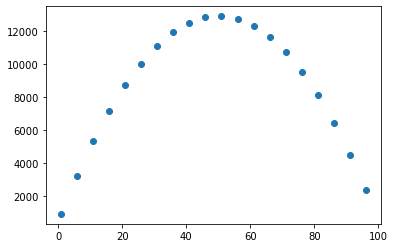

In [71]:
x, y = stress_model_function(100, -5, 5)

plt.scatter(x, y)
plt.plot()

As we can see, this is how office productivity (on the y axis) would vary with stress (on the x axis).

### Exercise 2.5 - Parameters and statistics.

* (a) The value of $52 is the population mean since it is calculated on the whole population. The value of $58 is the sample mean as it is explicitly calculated on a sample of 1500 households.
* (b) For the same reason, the population mean is 3.37. The sample mean is 3.59.

### Exercise 2.6 - Sleeping in college.

The sample mean is what the student got, i.e. 6.25 while the population mean is 5.5 as the college newspaper reported.

### Exercise 2.7 - Days off at a mining plant.

He should fire the ones with the least number of days off, so that the mean would increase.

### Exercise 2.8 - Medians and IQRs.

* (a) The medians are the same. So are IQRs. Indeed 5 and 7 are respectively the $25^{th}$ and $75^{th}$ percentiles.
* (b) Both medians and IQRs differ. 
* (c) Medians are different but IQRs are same. Indeed $4 - 2 = 9 - 7 = 2$.
* (d) Both medians and IQRs differ.

We can prove what we just found using numpy.

In [75]:
a1 = np.array([3, 5, 6, 7, 9])
a2 = np.array([3, 5, 6, 7, 20])
b1 = np.array([3, 5, 6, 7, 9])
b2 = np.array([3, 5, 7, 8, 9])
c1 = np.array([1, 2, 3, 4, 5])
c2 = np.array([6, 7, 8, 9, 10])
d1 = np.array([0, 10, 50, 60, 100])
d2 = np.array([0, 100, 500, 600, 1000])

for ar in [a1, a2, b1, b2, c1, c2, d1, d2]:
    print(np.median(ar), np.percentile(ar, 75) - np.percentile(ar, 25))
    print(f"Being q25 {np.percentile(ar, 25)} and q75 {np.percentile(ar, 75)}")

6.0 2.0
Being q25 5.0 and q75 7.0
6.0 2.0
Being q25 5.0 and q75 7.0
6.0 2.0
Being q25 5.0 and q75 7.0
7.0 3.0
Being q25 5.0 and q75 8.0
3.0 2.0
Being q25 2.0 and q75 4.0
8.0 2.0
Being q25 7.0 and q75 9.0
50.0 50.0
Being q25 10.0 and q75 60.0
500.0 500.0
Being q25 100.0 and q75 600.0


### Exercise 2.9 - Means and SDs.

Since _mean_ and _standard deviation_ are values which need to be calculated, we will set up a python script to do the comparisons for us.

In [81]:
def compare_dists(d1, d2):
    print(f"Comparing {d1} and {d2}!")
    
    d1 = np.array(d1)
    d2 = np.array(d2)

    if np.mean(d1) == np.mean(d2) and np.std(d1) == np.std(d2):
        print("Both mean and std equal!")
    elif np.mean(d1) == np.mean(d2) and np.std(d1) != np.std(d2):
        print("Only mean is equal!")
    elif np.mean(d1) != np.mean(d2) and np.std(d1) == np.std(d2):
        print("Only std is equal!")
    else:
        print("Both mean and std are different!")

    return 

And now let's test it with the given distributions.

In [82]:
compare_dists([3, 5, 5, 5, 8, 11, 11, 11, 13], [3, 5, 5, 5, 8, 11, 11, 11, 20])
compare_dists([-20, 0, 0, 0, 15, 25, 30, 30], [-40, 0, 0, 0, 15, 25, 30, 30])
compare_dists([0, 2, 4, 6, 8, 10], [20, 22, 24, 26, 28, 30])
compare_dists([100, 200, 300, 400, 500], [0, 50, 300, 550, 600])

Comparing [3, 5, 5, 5, 8, 11, 11, 11, 13] and [3, 5, 5, 5, 8, 11, 11, 11, 20]!
Both mean and std are different!
Comparing [-20, 0, 0, 0, 15, 25, 30, 30] and [-40, 0, 0, 0, 15, 25, 30, 30]!
Both mean and std are different!
Comparing [0, 2, 4, 6, 8, 10] and [20, 22, 24, 26, 28, 30]!
Only std is equal!
Comparing [100, 200, 300, 400, 500] and [0, 50, 300, 550, 600]!
Only mean is equal!


### Exercise 2.10 - Mix-and-match.

* (a) This rather resembles a normal distribution. I would match it with (3).
* (b) This looks like a distribution without a particular shape. I would match it with (2).
* (c) This is a right-skewed distribution which should be paired with (1).

### Exercise 2.11 - Air quality.

* (a) I would estimate the median to be between 25 and 30.
* (b) The mean AQI is expected to be higher due to the light yet evident right-skewness.
* (c) I would assume Q1 to be roughly 20 while Q3 40. Therefore IQR is about 20.
* (d) Since we see that the histogram curve goes smoothly, I don't see any particular outlier.

### Exercise 2.12 - Median vs. mean.

I would assume the median to be within 70 and 80, and the mean to be lower, since the distribution is left-skewed.

### Exercise 2.13 - Histograms vs. box plots.

In the histogram, I can see the two main modes of the distribution and the right skewness (if any). In the box plot I can see the outliers and the median and IQR.

### Exercise 2.14 - Facebook friends.

Since the mean is 190 and the median is 100, I would argue that the distribution is right-skewed.

### Exercise 2.15 - Distributions and appropriate statistics, Part I.

* (a) Right-skewed. I would say median represents the data since it's more common to have 1/2 pets than maybe 6/7, even though there are lots of people having way above 10+ pets, and this would pull the mean towards a bigger more unrealistic number to be used as a statistic. I would use the IQR to represent the variability.
* (b) Right-skewer. Indeed, people tend to live closer to work. Here the mean and standard deviation would represent good statistics since such an information needs to be part of some studies where one wants to analyze the performances based on unusual observations and make appropriate decisions about it, considering the whole set of values.
* (c) Symmetric. Here it is harder. Both mean and median can do a good job since they're approximately similiar, therefore let's go with the mean. Standard deviation is also good, so we can go about it too.

### Exercise 2.16 - Distributions and appropriate statistics, Part II.

* (a) Right skewed. I would say that the median represent the data, as well as the IQR would be of choice to represent the dispersion. The reason is that, even though the number of houses that cost more than $6,000,000 is meaningful, it is still a number which can be considered an outlier.
* (b) Symmetric. Here we can use the mean and standard deviation interchangeably with the median and the IQR, given the symmetry.
* (c) Right skewed (those who drink a lot are the tail, while around 0 we have a huge number). Mean and standard deviation should be ok here, and given the high numbers of expected zeroes, they are actually advised.
* (d) Symmetric. Here mean and standard deviation would be great also because we are dealing with continuous values (i.e. salaries).

### Exercise 2.17 - Income at the coffee shop.

* (a) The median of course. The mean would be very deceptive since it is not robust and those two outliers would pull it way above the expected salary for that coffee shop.
* (b) For the same reason as above, the IQR best represent the variability.

### Exercise 2.18 - Midrange.

This statistic is not robust and indeed it heavily depends on the outliers (both small and big). And outlier is with high chance the minimum value or maximum value of any distribution (unless there are no outliers at all), and this will make such a deceptive statistic.

### Exercise 2.19 - Commute times.

* (a) Since the distribution is symmetric, I don't see why we should log transform it. 
* (b) The map shows the average commuting time for each county. The color gradient ranges from green to black: green represents the shortest commuting time while black represents the longest (33 or more minutes).

### Exercise 2.20 - Hispanic population.

* (a) Being right skewed, by using the log-transformed values we are using more meaningful (data-wise) data.
* (b) The relative presence of Hispanic is more evident in the map than in the histogram. In the histogram it is more clear the percent of hispanic among the total population.
* (c) It drills down to what we want to show, and as I explained above, each graph is more useful to represent an information than the other. So there's no free lunch.

### Guided Practice 2.23

* (a) It represents the percentage of individuals who rent.
* (b) It represents the percentage of mortgage from individuals.

### Guided Practice 2.24

* (a) It represents the percentage of joint applications who own.
* (b) It represents the percentage of those who own who have done a joint application.

### Guided Practice 2.28

The center of the `Gain` group is definitely greater than the `No Gain` group's, and same goes for the variability (which can easily be deducted from the hollow histogram). The shape is notvery similar since the `Gain` group has only one mode, while the `No Gain` has visibly two prominent modes.

### Guided Practice 2.29

Descriptive statistics are definitely more visible in the side-by-side box plots, while the shape of the data (the number of modes, the spread, etc) are more visible in the hollow histogram.

### Exercise 2.21 - Antibiotic use in children.

* (a) Relative frequency.
* (b) Maybe the different coloring catches the attention better on the distribution? Otherwise I don't know.
* (c) The bar plot, absolutely.

### Exercise 2.22 - Views on immigration.

* (a) $\frac{372}{910} = 40.88\%$.
* (b) $\frac{278}{910} = 30.55\%$.
* (c) $\frac{57}{372} = 15.32\%$, $\frac{120}{363} = 33.06\%$ and $\frac{101}{175} = 57.71\%$, respectively.
* (d) Political ideology and view on the immigration matter seem to be dependent, since we can see this sort of gradient of percentages which is very low for conservatives (not supporting this view) but very high for liberals supporting this view.

### Exercise 2.23 - Views on the DREAM Act.

The size of the tile representing Liberals who support the DREAM act seems to be greater than the respective tile in the other two political groups.

### Exercise 2.24 - Raise taxes.

Democrats support rasing taxes on the rich more than the other two groups, as we can see from the considerably larger tile.

### Guided Practice 2.31

The two variables are not associated, i.e. independent.

### Guided Practice 2.32

This an experiment (we are randomizing the control and treatment groups). The sample size is quite small but it shows that there is a causal relationship between vaccine and immunity.

### Guided Practice 2.34

The infection rates are still different and in the treatment group we have 50% infection rate, while in the control group 33%. The 50% is of course less than 64%, but this is a purely random shuffle.

### Exercise 2.25  - Side effects of Avandia.

* (a)
    * (i) False. People using this medicine are more than those using the alternative.
    * (ii) False. The difference is so small it can be due to chance.
    * (iii) False. The rate of incidence is marginally higher.
    * (iv) True, the rates of incidence differ by a small amount.
* (b) $\frac{7,979}{227,571} = 3.51\%$.
* (c) I am assuming they are already independent and that is the correct proportion.
* (d)
    * (i) We are testing whether or not rosiglitazone usage causes heart problems.
    * (ii) Actually fewer patients with cardiovascular problems.
    * (iii) It suggests they're independent facts.

### Exercise 2.26 - Heart transplants.

* (a) Here we are seeing a difference in outcomes, but it's early to tell if there's a difference in survival.
* (b) It suggests that it definitely works in keeping the individual alive for a way longer time at least than those in the control group.
* (c) Respectively, $\frac{45}{69} = 65.21\%$ and $\frac{30}{34} = 88.23\%$.
* (d)
    * (i) It's being tested if heart transplant is effective in preventing death associated with severe heart disease.
    * (ii) 28; 75; 69; 34; zero; 0.25.
    * (iii) It definitely suggests the outcomes are not random.